In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Part 1:  playing with labeled data

In this part of the assignment we will experiment with scikit-learn's functionality for creating toy datasets [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).
Consider the following two datasets created as follows:

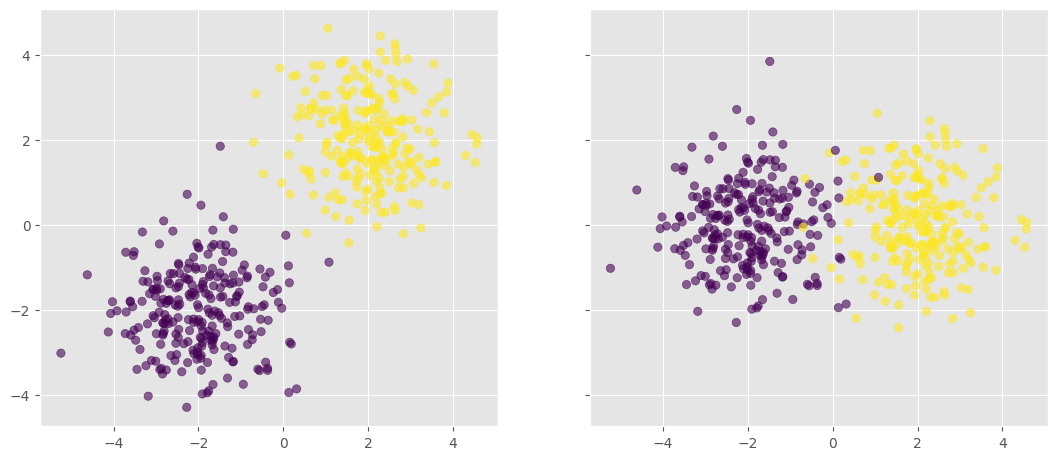

In [2]:
from sklearn.datasets import make_blobs

N = 500
seed = 42

# create the first dataset:
centers = [[-2,-2],[2,2]]
X1, y1 = make_blobs(n_samples=N, centers=centers, random_state=42)

# create the second dataset:
centers = [[-2,0],[2,0]]
X2, y2 = make_blobs(n_samples=N, centers=centers, random_state=42)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(13,6))
ax1.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.6);
ax1.set_aspect('equal')
ax2.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.6);
ax2.set_aspect('equal')


#### Feature visualization

Plot histograms of the individual features in each of the two datasets generated above, color-coded by class, similarly to the way we visualized the iris dataset in our first notebook on labeled data.  Use matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to generate the histogram and use the ''density=True'' option to generated a histogram normalized to be a distribution.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots as we did above.

Comment on the differences between the histograms, and relate them to the parameters provided to `make_blobs`.  More specifically, explain why the 2nd feature of the dataset shown on the right (shown in the y-axis above), is not useful for classification purposes, and what is it about the parameters provided to `make_blobs` that made it so.

(array([0.04461006, 0.14338949, 0.28359254, 0.36325336, 0.37281266,
        0.21667745, 0.13383019, 0.02549146, 0.00637287, 0.00318643]),
 array([-2.42387933, -1.79621824, -1.16855716, -0.54089608,  0.086765  ,
         0.71442608,  1.34208716,  1.96974825,  2.59740933,  3.22507041,
         3.85273149]),
 <BarContainer object of 10 artists>)

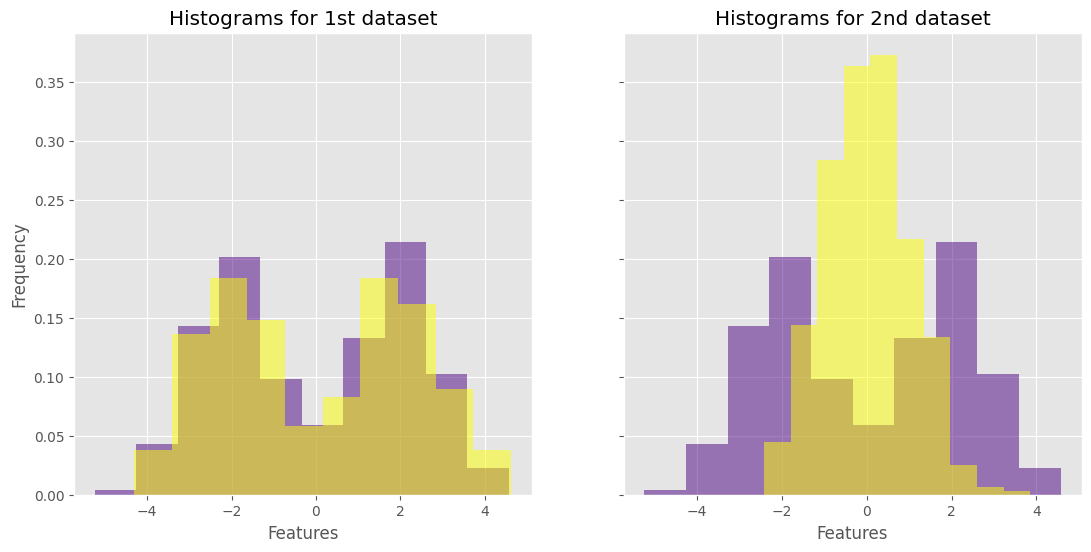

In [6]:
#your code here
fig, (ax3, ax4) = plt.subplots(1,2,sharey='row', figsize=(13,6))
ax3.set_title('Histograms for 1st dataset')
ax3.set_xlabel('Features')
ax3.set_ylabel('Frequency')
ax3.hist(X1[:,0], color='indigo', density=True, alpha=0.5)
ax3.hist(X1[:,1], color='yellow', density=True, alpha=0.5)
ax4.set_title('Histograms for 2nd dataset')
ax4.set_xlabel('Features')
ax4.hist(X2[:,0], color='indigo', density=True, alpha=0.5)
ax4.hist(X2[:,1], color='yellow', density=True, alpha=0.5)

*In the histograms, you can see the two features of the datasets plotted with purple representing the x-axis and yellow representing the y-axis. The purple histogram for both datasets are the same as the centers used in the dataset use the same x-values, -2 and 2. In contrast, the y-values are different for the two. This can be observed with the location of the peaks in the histograms. The peaks are at where the frequency is the highest, which is also where the centers are. In the 2nd dataset, we can see that the centers have the same values for the y-axis at 0. This second feature does not provide any information that helps seperate the clusters, so it is not useful*.

### Part 2:  Exploring the Palmer Penguins dataset

In this part of the assignment we will analyze the [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins/), which measures the characteristics of three species of penguins:

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="500">

The data contains multiple characteristics of a penguin:  its species,  sex, the island on which it was observed, and other measurments.
We will be interested in looking at four specific characteristics:
bill length, bill depth, flipper length, and body mass.

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">


#### Reading the data

The dataset is stored in three CSV files, one for each species of penguins.
We will use NumPy's [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to read the CSV files directly from the URL in which they are stored without having to first download the data to your computer.
The following command will read in the data for the four characteristics we are interested in for the Adelie species of penguins:

In [4]:
import pandas as pd
adelie_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.5&entityid=002f3893385f710df69eeebe893144ff"
#adelie_data=np.genfromtxt(adelie_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
adelie_data = pd.read_csv(adelie_data_url, usecols=range(9,13)).values
print(adelie_data.shape)

(152, 4)


If you put that URL in your browser, this will download a CSV file to your computer.  We recommend doing that so you can see how the data file looks like.
Also note that the data contains `NaN` values.  We will ask that you remove all examples for which one or more of the feature values are `NaN`.
Here are the urls for the other species of penguins:

In [5]:
gentoo_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.5&entityid=e03b43c924f226486f2f0ab6709d2381"
chinstrap_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.6&entityid=fe853aa8f7a59aa84cdd3197619ef462"
gentoo_data = pd.read_csv(gentoo_data_url, usecols=range(9,13)).values
chinstrap_data = pd.read_csv(chinstrap_data_url, usecols=range(9,13)).values

In [6]:
print(chinstrap_data.shape,gentoo_data.shape)

(68, 4) (124, 4)


In [7]:
#Dropping all NaN values for all 3 datasets
adelie_data = adelie_data[~np.any(np.isnan(adelie_data), axis=1)]
gentoo_data = gentoo_data[~np.any(np.isnan(gentoo_data), axis=1)]
chinstrap_data = chinstrap_data[~np.any(np.isnan(chinstrap_data), axis=1)]


### Creating a labeled dataset

Your first task is to create a labeled dataset, from the three CSV files in the links above with a class label that represents the species of a penguin; in other words, you will compute a feature matrix with the four variables that you extract from the CSV files, and a label for each row in the matrix which indicates which species of penguin it is.  Use the numbers 0,1,2 to represent the species Adelie, Gentoo, and Chinstrap, respectively.
Similar to how scikit-learn packages the iris dataset using a function [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), we ask that you write a function called `load_penguins` with the following behavior:

In [8]:
def load_penguins() :
    """
    returns a two dimensional array representing the feature matrix
    of the data and a one dimensional array that contains the lables
    
    Example usage:
    X,y = load_penguins()
    the array X is a two dimensional array and y is a one dimensional 
    array such that y[i] is the label for X[i]
    """
    data = np.vstack((adelie_data, gentoo_data, chinstrap_data))
    
    zeros = np.zeros(len(adelie_data))
    ones = np.ones(len(gentoo_data))
    twos = np.full(len(chinstrap_data),2)
    
    labels = np.hstack((zeros, ones, twos))
    int_labels = labels.astype(int)
    
    return (data, int_labels)

In [9]:
X, y = load_penguins()

# your code had better pass the following tests:
try :
    # the feature matrix matches the vector of labels in length:
    assert len(X) == len(y)
    # the number of features is equal to 4:
    assert len(X[0]) == 4
    # missing values have been removed:
    assert np.sum(np.isnan(X)) == 0
except :
    print("there are some issues in your data")

### Feature visualization


As described above, your dataset will contain the following four features:
culmen length, culmen width, flipper length, and body mass.
Suppose you wanted to design a machine learning algorithm that predicts the species of a penguin based on two out of the four features, and for simplicity assume you need to choose between the following combinations:
culmen length and culmen width or flipper length and body mass.
Visualize the data using scatter plots color-coded by species of penguin to make that decision.  Use Matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function for this purpose (overall, you will generate two scatter plots - one for each of the two feature combinations specified above).
Explain your choice!
Now, what is the single most predictive feature among the four?
To determine that, plot histograms of the four features color coded by species like we did for the iris dataset using Matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots.


*From the scatter plots below, it is apparent that the combination of culmen length and culmen width is a better predictor os species of a penguin. Looking at the two graphs, the 2st one has clear clusters of the three species whereas in the 2nd one, there is a lot of overlap between the purple and yellow points, which can cause inaccurate predictions. Although the y-axis for the purple and yellow points are similar, the x-axis is different so there is a clear indiciation of the two clusters. I think the most predictive feature is the culmen length, as the peaks of each species does not overlap as much as the others. It seems to be the most distinct and, therefore, is the most useful to predict which species is which. Flipper length could also be a good predictor out of the four due to its lack of overlap.*

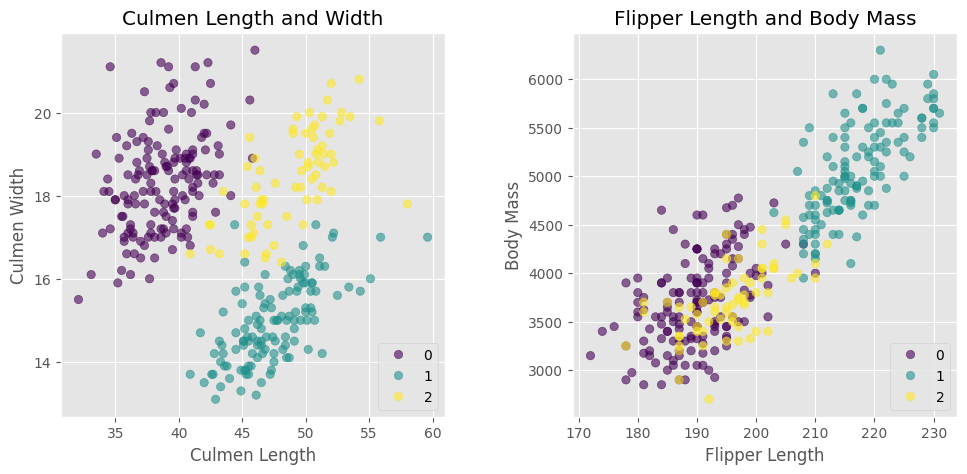

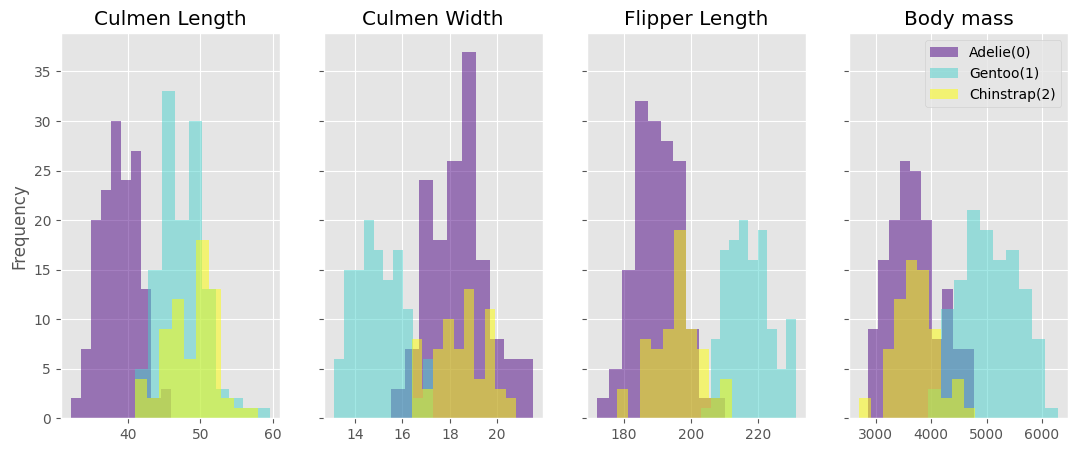

In [10]:
# it should include relevant plots and the Python code to generate them
fig1 = plt.figure()
subplot1 = fig1.add_subplot(121, position=[0.1,0.1,0.6,0.8])
sc1 = subplot1.scatter(X[:,0], X[:,1], c=y, alpha=0.6)
subplot1.set_title('Culmen Length and Width')
subplot1.set_xlabel('Culmen Length')
subplot1.set_ylabel('Culmen Width')

subplot2 = fig1.add_subplot(122, position=[0.9,0.1,0.6,0.8])
sc2 = subplot2.scatter(X[:,2], X[:,3], c=y, alpha=0.6)
subplot2.set_title('Flipper Length and Body Mass')
subplot2.set_xlabel('Flipper Length')
subplot2.set_ylabel('Body Mass')

subplot1.legend(*sc1.legend_elements(), loc='lower right')#got from stack overflow
subplot2.legend(*sc2.legend_elements(), loc='lower right')#got from stackoverflow

#Creating arrays based on penguin species
label_0 = X[y == 0]
label_1 = X[y == 1]
label_2 = X[y == 2]

fig2, (hist1, hist2, hist3, hist4) = plt.subplots(1,4,sharey='row', figsize=(13,5))

hist1.hist(label_0[:,0], color='indigo', alpha=0.5)
hist1.hist(label_1[:,0], color='mediumturquoise', alpha=0.5)
hist1.hist(label_2[:,0], color='yellow', alpha=0.5)
hist1.set_title('Culmen Length')
hist1.set_ylabel('Frequency')


hist2.hist(label_0[:,1], color='indigo', alpha=0.5)
hist2.hist(label_1[:,1], color='mediumturquoise', alpha=0.5)
hist2.hist(label_2[:,1], color='yellow', alpha=0.5)
hist2.set_title('Culmen Width')

hist3.hist(label_0[:,2], color='indigo', alpha=0.5)
hist3.hist(label_1[:,2], color='mediumturquoise', alpha=0.5)
hist3.hist(label_2[:,2], color='yellow', alpha=0.5)
hist3.set_title('Flipper Length')

hist4.hist(label_0[:,3], color='indigo', label='Adelie(0)', alpha=0.5)
hist4.hist(label_1[:,3], color='mediumturquoise', label='Gentoo(1)', alpha=0.5)
hist4.hist(label_2[:,3], color='yellow', label='Chinstrap(2)', alpha=0.5)
hist4.set_title('Body mass')
hist4.legend()

### Part 3:  Splitting data into train and test sets

Whenever you train and evaluate a machine learning classifier, you need to split your data into separate training and test sets.
Scikit-learn already provides this functionality with its [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
In this question we will provide you several potential implementations.  The first one is correct.  For each one of the rest, you will need to indicate whether it is correct or not and answer a few additional questions.

Each of the implementations uses the NumPy [permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html) or [shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html) functions to reorder the data.

First here's the formal description of the function:

In [11]:
def train_test_split(X, y, test_fraction=0.2, seed=42):
    """
    split the given dataset into training and test sets
    
    arguments:
        X - two dimensional NumPy array that contains the feature matrix
        y - a NumPy array that contains the labels
        test_fraction - the fraction of data to be used as the test set.
        This is a number between 0 and 1.
        seed - random number generator seed that allows to create
        reproducible results
    
    return value:
        the function returns a tuple of four NumPy arrays:
        X_train,y_train,X_test,y_test where X_train,y_train are 
        the features and labels for the training set and X_test,y_test
        are the features and labels for the test set.
    """
    
    return (np.random.rand(8, 2),
            np.random.randint(0, 2,size=(8,)),
            np.random.rand(2, 2),
            np.random.randint(0, 2,size=(2,)))

# example function call:  
X_train,y_train,X_test,y_test = train_test_split(X, y, 0.2)

Next, here are the four implementations:

In [12]:
def train_test_split1(X, y, test_fraction=0.2, seed=42):
    rng = np.random.default_rng(seed)
    train_len = round(len(X)*(1-test_fraction))
    rand_ind = np.random.permutation(len(X))
    train_ind = rand_ind[:train_len]
    test_ind = rand_ind[train_len:]

    return X[train_ind], y[train_ind], X[test_ind], y[test_ind]


In [13]:
def train_test_split2(X, y, test_fraction=0.2, seed=42):
    X_copy = X.copy()
    y_copy = y.copy()
    test_len = round(len(X) * test_fraction)
    rng = np.random.default_rng(seed)
    rng.shuffle(X_copy)
    rng.shuffle(y_copy)
    X_test = X_copy[:test_len]
    y_test = y_copy[:test_len]
    X_train = X_copy[test_len:]
    y_train = y_copy[test_len:]
    return X_train, y_train, X_test, y_test


In [14]:
def train_test_split3(X, y, test_fraction=0.2, seed=50):
    test_len = round(len(X) * test_fraction)
    test_examples = np.zeros(len(X))
    test_examples[:test_len] = 1
    rng = np.random.default_rng(seed)
    rng.shuffle(test_examples)    
    return (X[test_examples == 0],
            y[test_examples==0],
            X[test_examples==1],
            y[test_examples==1])


In [15]:
def train_test_split4(X, y, test_fraction=0.2, seed=42):
    combined = np.hstack((X, y[:,np.newaxis]))
    rng = np.random.default_rng(seed)
    rng.shuffle(combined)
    split_point = round(len(combined)*test_fraction)
    te,tr = combined[:split_point], combined[split_point:]
    
    return (tr[:,:-1],tr[:,-1],te[:,:-1],te[:,-1])


In [16]:
X = np.array([[1,2,3,4,5], [6,7,8,9,0], [10,20,30,40,50], [60,70,80, 90, 100]])
y = np.array([0,1,1,0])
train_test_split4(X,y)

(array([[10, 20, 30, 40, 50],
        [ 6,  7,  8,  9,  0],
        [ 1,  2,  3,  4,  5]]),
 array([1, 1, 0]),
 array([[ 60,  70,  80,  90, 100]]),
 array([0]))

Answer the following:

*Is train_test_split2 correct?*  If not, explain what the problem is.

    - The function, train_test_split2, is not correct because both of the copies of X and y are shuffled, so the labels will no longer be associated with the features. You need to create an array with indices, so that can be used for both the features and labels.

*Is train_test_split3 correct?*  If not, explain what the problem is.

    - The function, train_test_split3, is not correct because it never shuffles X like the first function did with the permutation function. Only the array of indeces is shuffled, which means X will always be in its original order, with few test data taken out. For it to be correct, X would need to be shuffled.

*Is train_test_split4 correct?*  If not, explain what the problem is.  Also, explain the idea behind using the combined dataset created by the statement `combined = np.hstack((X, y[:,np.newaxis]))`.  In this statement, also explain why we couldn't feed y as is to the `hstack` command, and needed to change its shape using `np.newaxis`.
    
    - The method, train_test_split4, is correct as it shuffles the data and returns the accurate pairing of X values with y values. The idea behind using the combined data using the statement described is that you are appending the labels to the end of the row. After this, you can shuffle the entire row without having to worry about maintaining thr correct pairings. After shuffling, you can simply just return the last values of each row for the y using negative indexing. The hstack command requires all arrays to be combined to have the same dimensions. Since y is 1D and X is 2D, we need to add a new axis to y, so that hstack will function properly. 




In the following code cell we created data for a binary classification problem using the scikit-learn's make_blobs.  Explain the differences between the two plots and how they are related to the correctness of the implementations.

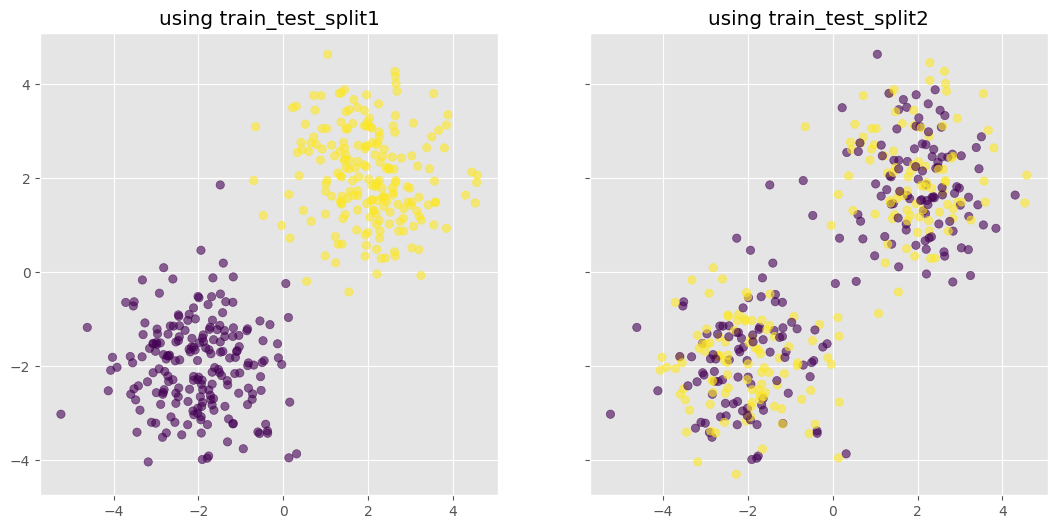

In [17]:
from sklearn.datasets import make_blobs

N = 500
seed = 42

centers = [[-2,-2],[2,2]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

X_train1,y_train1,X_test1,y_test1 = train_test_split1(X, y, 0.2, seed)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(13,6))
ax1.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, alpha=0.6);
ax1.set_title('using train_test_split1')

X_train2,y_train2,X_test2,y_test2 = train_test_split2(X, y, 0.2, seed)
ax2.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, alpha=0.6);
ax2.set_title('using train_test_split2');


*Figure 1 is impleneted using train_test_split1, so it is correct as you can clearly see the clusters of the data. Figure 2 uses train_test_split2, which is implemented incorrectly as it does not maintain the pairings of the data to their labels. This is apparent in the 2nd figure since the purple and yellow points are all mixed up. The data is in the same places as the 1st figure, but the labels are mixed up. What was supposed to be yellow could be purple, and vice-versa.*

### Your Report

Please answer the questions in the cells reserved for that purpose.  


### Submission

Submit your report as a Jupyter notebook via Canvas. Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you in doing that:  

```
Grading sheet for assignment 1

Part 1:  20 points.
Part 2:  40 points.
  Assembling the data:  20 pts
  Creation of histograms/scatterplots of features: 10 points
  Discussion of the plots: 10 points
Part 3:  40 points
```

Grading will be based on the following criteria:

  * Code correctness.
  * Plots are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.